# Import Library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# Load Dataset

In [2]:
df_raw = pd.read_csv('Clicked Ads Dataset.csv', index_col=0)
pd.set_option('display.max_columns', None)

In [3]:
df = df_raw.copy()

In [4]:
df.sample(5)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,city,province,category
691,87.16,37,NaN,231.95,Laki-Laki,3/16/2016 20:33,No,Jakarta Pusat,Daerah Khusus Ibukota Jakarta,Fashion
748,45.11,58,278598110.0,195.69,Perempuan,1/5/2016 16:26,Yes,Cimahi,Jawa Barat,House
238,74.32,33,434420770.0,128.17,Perempuan,5/23/2016 21:14,Yes,Jakarta Timur,Daerah Khusus Ibukota Jakarta,Finance
49,48.01,46,380002700.0,119.93,Perempuan,4/25/2016 11:01,Yes,Palembang,Sumatra Selatan,Furniture
17,82.03,41,500577560.0,187.53,Perempuan,5/2/2016 7:00,No,Depok,Jawa Barat,Health


In [5]:
df.rename(columns={'Male': 'Gender'}, inplace=True)

In [6]:
df.shape

(1000, 10)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  987 non-null    float64
 1   Age                       1000 non-null   int64  
 2   Area Income               987 non-null    float64
 3   Daily Internet Usage      989 non-null    float64
 4   Gender                    997 non-null    object 
 5   Timestamp                 1000 non-null   object 
 6   Clicked on Ad             1000 non-null   object 
 7   city                      1000 non-null   object 
 8   province                  1000 non-null   object 
 9   category                  1000 non-null   object 
dtypes: float64(3), int64(1), object(6)
memory usage: 85.9+ KB


# Exploratory Data Analysis

### Pengelompokan kolom berdasarkan jenisnya

In [8]:
# Pengelompokan kolom berdasarkan jenisnya
cats = [i for i in df.columns if df[i].dtypes == 'object' and i != 'Clicked on Ad']
nums = [i for i in df.columns if df[i].dtypes != 'object']

## Statistical Summary

In [9]:
df[nums].describe().T

,count,mean,std,min,25%,50%,75%,max
Daily Time Spent on Site,987.0,6.492952e+01,1.584470e+01,32.60,5.127000e+01,6.811000e+01,7.846000e+01,9.143000e+01
Age,1000.0,3.600900e+01,8.785562e+00,19.00,2.900000e+01,3.500000e+01,4.200000e+01,6.100000e+01
Area Income,987.0,3.848647e+08,9.407999e+07,97975500.00,3.286330e+08,3.990683e+08,4.583554e+08,5.563936e+08
Daily Internet Usage,989.0,1.798636e+02,4.387014e+01,104.78,1.387100e+02,1.826500e+02,2.187900e+02,2.670100e+02


In [10]:
df[cats].describe().T

,count,unique,top,freq
Gender,997,2,Perempuan,518
Timestamp,1000,997,5/26/2016 15:40,2
city,1000,30,Surabaya,64
province,1000,16,Daerah Khusus Ibukota Jakarta,253
category,1000,10,Otomotif,112


In [11]:
# Count values
for i in cats:
    print(f'''Value count kolom {i}:''')
    print(df[i].value_counts())
    print()

Value count kolom Gender:
Perempuan    518
Laki-Laki    479
Name: Gender, dtype: int64

Value count kolom Timestamp:
5/26/2016 15:40    2
5/30/2016 8:02     2
5/20/2016 12:17    2
5/15/2016 3:10     1
4/5/2016 8:18      1
                  ..
5/12/2016 4:35     1
1/1/2016 21:58     1
3/13/2016 13:50    1
7/16/2016 14:13    1
6/3/2016 21:43     1
Name: Timestamp, Length: 997, dtype: int64

Value count kolom city:
Surabaya             64
Bandung              64
Jakarta Timur        63
Jakarta Selatan      61
Jakarta Barat        57
Bekasi               56
Medan                48
Jakarta Utara        45
Palembang            42
Semarang             41
Batam                34
Makassar             33
Tangerang Selatan    33
Tangerang            32
Depok                30
Bandar Lampung       29
Bogor                28
Jakarta Pusat        27
Malang               26
Banjarmasin          23
Pakanbaru            23
Denpasar             21
Padang               19
Balikpapan           18
Cimahi  

## Univariate Analysis

In [12]:
col = ['Age', 'Daily Time Spent on Site', 'Daily Internet Usage']

### Boxplot

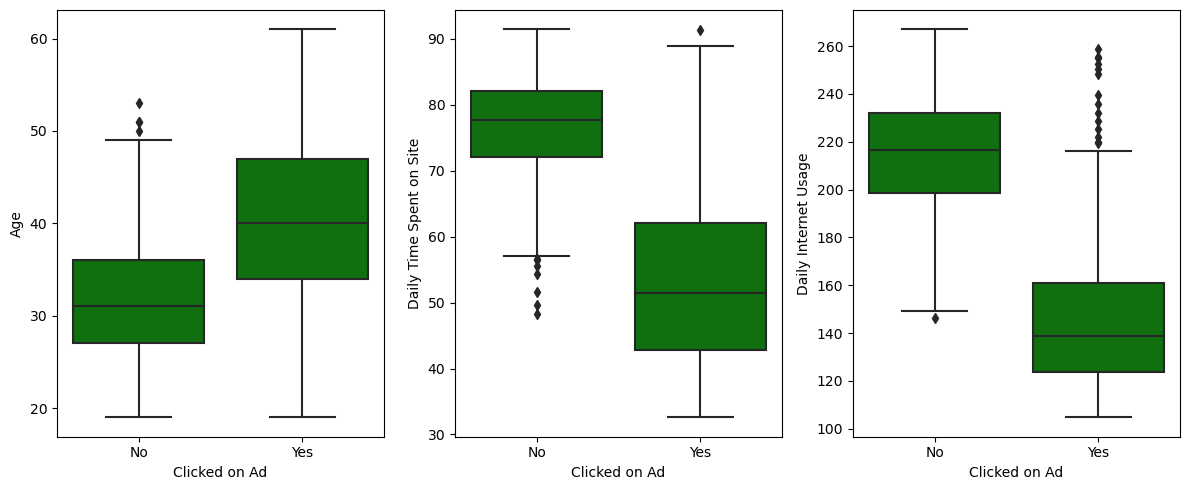

In [13]:
plt.figure(figsize=(12,5))
for i in range(0, len(col)):
    plt.subplot(1, 3, i+1)
    sns.boxplot(x='Clicked on Ad', y=col[i], data=df, color='green', orient='v')
    plt.tight_layout()

plt.show()

## Bivariate Analysis

In [14]:
yes = df[df['Clicked on Ad'] == 'Yes']
no = df[df['Clicked on Ad'] == 'No']

### Total Click on Ads with Age

In [15]:
dfg = df.groupby(['Age','Clicked on Ad']).aggregate({'Gender':'count'}).rename(columns={'Gender': 'Jumlah'}).reset_index()

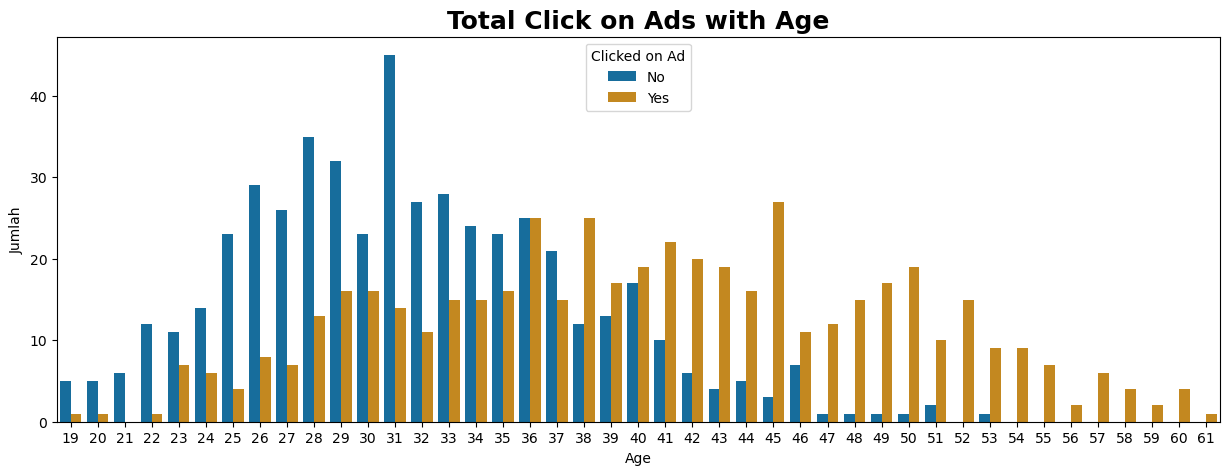

In [16]:
plt.figure(figsize=(15,5))
sns.barplot(x='Age', y='Jumlah', data=dfg, hue='Clicked on Ad', palette='colorblind')
plt.title('Total Click on Ads with Age', weight='bold', size=18)
plt.show()

### Distribution of Daily Time Spent on Site

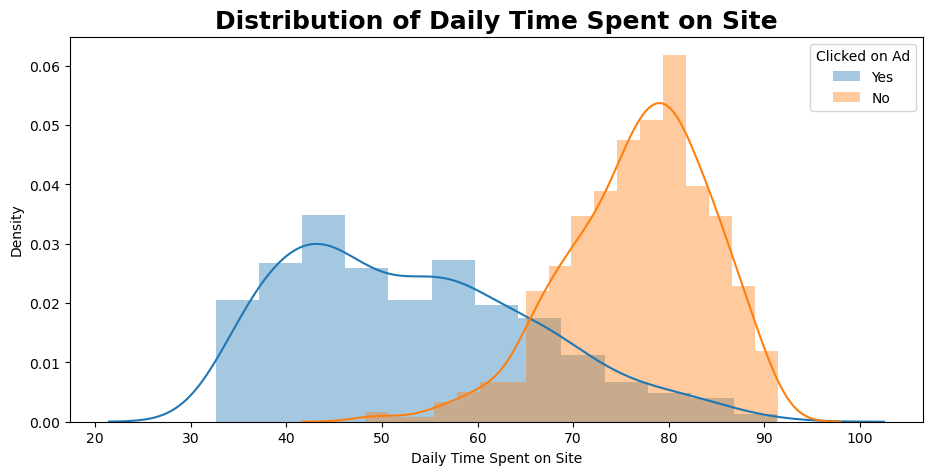

In [17]:
plt.figure(figsize=(11, 5))
sns.distplot(yes['Daily Time Spent on Site'], label= 'Yes')
sns.distplot(no['Daily Time Spent on Site'], label= 'No')
plt.legend(title='Clicked on Ad')
plt.title('Distribution of Daily Time Spent on Site', weight='bold', size = 18)
plt.show()

### Distribution of Daily Internet Usage

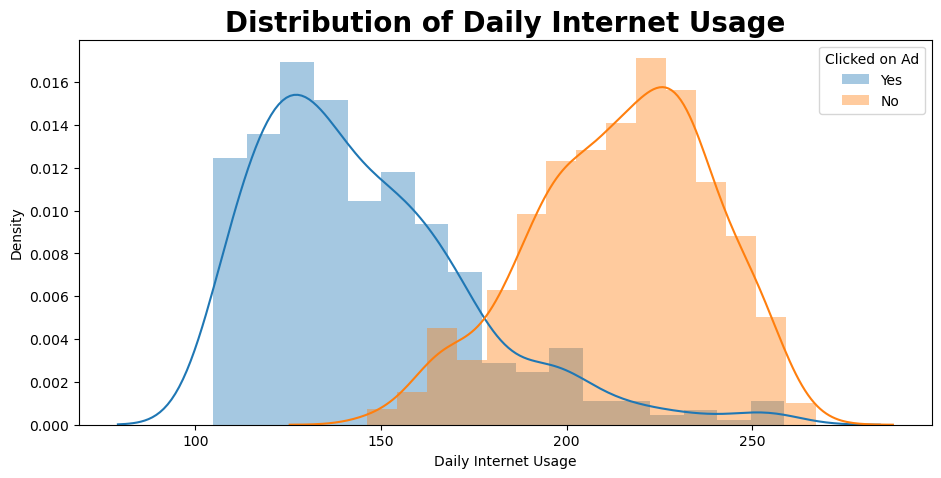

In [18]:
plt.figure(figsize=(11,5))
sns.distplot(yes['Daily Internet Usage'], label= 'Yes')
sns.distplot(no['Daily Internet Usage'], label='No')
plt.legend(title='Clicked on Ad')
plt.title('Distribution of Daily Internet Usage', weight='bold', size = 20)
plt.show()

## Multivariate Analysis

In [19]:
from sklearn.preprocessing import LabelEncoder

def calculate_correlation(dataframe):
    # Mengubah kolom-kolom non-numerik menjadi representasi numerik
    label_encoder = LabelEncoder()
    for column in dataframe.columns:
        if dataframe[column].dtype == 'object':
            dataframe[column] = label_encoder.fit_transform(dataframe[column])

    correlation_matrix = dataframe.corr()
    return sns.heatmap(correlation_matrix, annot = True, cmap='coolwarm', fmt='.2f')

<AxesSubplot:>

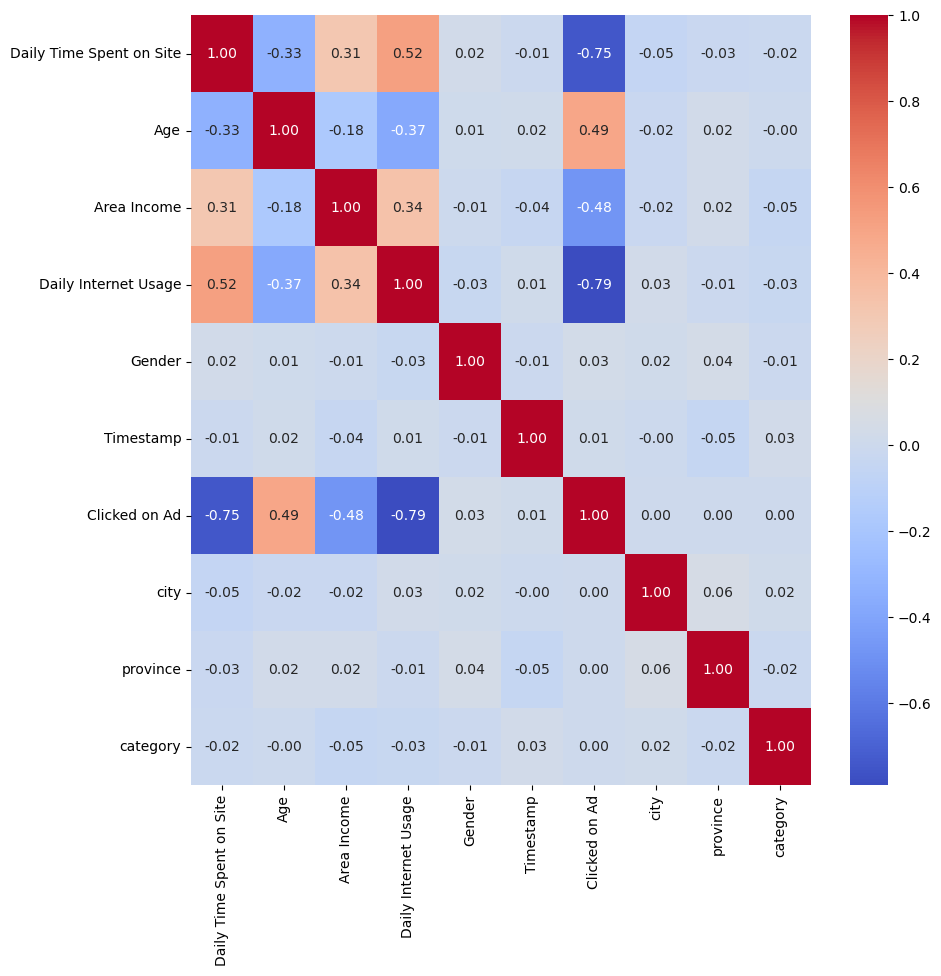

In [20]:
df_cor = df.copy()

plt.figure(figsize=(10,10))
calculate_correlation(df_cor)

## Data Cleaning & Preprocessing

### Missing Values

In [21]:
df.isna().sum()

Daily Time Spent on Site    13
Age                          0
Area Income                 13
Daily Internet Usage        11
Gender                       3
Timestamp                    0
Clicked on Ad                0
city                         0
province                     0
category                     0
dtype: int64

#### Handling kolom `Daily Time Spent on Site`, `Area Income`, `Daily Internet Usage`, `Gender`

In [22]:
for i in ['Yes','No'] :
    df.loc[df['Clicked on Ad'] == i, 'Daily Time Spent on Site'] = df.loc[df['Clicked on Ad'] == i, 'Daily Time Spent on Site'].fillna(df.loc[df['Clicked on Ad'] == i, 'Daily Time Spent on Site'].mean())
    df.loc[df['Clicked on Ad'] == i, 'Area Income'] = df.loc[df['Clicked on Ad'] == i, 'Area Income'].fillna(df.loc[df['Clicked on Ad'] == i, 'Area Income'].mean())
    df.loc[df['Clicked on Ad'] == i, 'Daily Internet Usage'] = df.loc[df['Clicked on Ad'] == i, 'Daily Internet Usage'].fillna(df.loc[df['Clicked on Ad'] == i, 'Daily Internet Usage'].mean())

In [23]:
df['Gender'].fillna(df['Gender'].mode()[0], inplace= True)

### Duplicate Data

In [24]:
df.duplicated().sum()

0

### Invalid Type Data

In [25]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

In [26]:
df_clean = df.copy()

## Feature Encoding

In [27]:
df_encode = df_clean.copy()

In [28]:
cols = ['Gender','city','Clicked on Ad','province','category']

label_encoder = LabelEncoder()

for i in cols:
    df_encode[i] = label_encoder.fit_transform(df[i])

## Split Data

In [29]:
x = df_encode.drop('Clicked on Ad', axis = 1)
y = df_encode['Clicked on Ad']

In [30]:
y.value_counts()

0    500
1    500
Name: Clicked on Ad, dtype: int64

In [31]:
x['Tahun'] = x['Timestamp'].apply(lambda x : x.year)
x['Bulan'] = x['Timestamp'].apply(lambda x : x.month)
x['Tanggal'] = x['Timestamp'].apply(lambda x : x.day)
x['Pekan'] = x['Timestamp'].apply(lambda x : x.week)

x.drop(columns=['Timestamp','Bulan','Tahun'],inplace=True)

# Modeling

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [33]:
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()

X_test_norm = X_test.copy()
X_train_norm = X_train.copy()
for i in X_train_norm.columns :
    X_train_norm[i] = minmax.fit_transform(X_train_norm[i].values.reshape(-1, 1))
    X_test_norm[i] = minmax.fit_transform(X_test_norm[i].values.reshape(-1, 1))

## Function Evaluation

In [34]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_validate

def eval_classification(model):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_train)
    
    print("Accuracy (Train Set): %.2f" % accuracy_score(y_train, y_pred_train))
    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred),"\n")

    print("Precision (Train Set): %.2f" % precision_score(y_train, y_pred_train))
    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred),"\n")

    print("Recall (Train Set): %.2f" % recall_score(y_train, y_pred_train))
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred),"\n")

    print("F1-Score (Train Set): %.2f" % f1_score(y_train, y_pred_train))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred),"\n")
    
    print("roc_auc (train-proba): %.2f" % roc_auc_score(y_train, y_pred_proba_train[:, 1]))
    print("roc_auc (test-proba): %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]),"\n")
    
    score = cross_validate(model, x, y, cv=5, scoring='accuracy', return_train_score=True)
    print('roc_auc (crossval train): '+ str(score['train_score'].mean()))
    print('roc_auc (crossval test): '+ str(score['test_score'].mean()),"\n")

def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=x.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

def show_best_hyperparameter(model):
    print(model.best_estimator_.get_params())

## Skenario 1 (Model Tanpa Normalisasi)

### Logistic Regression

In [35]:
from sklearn.linear_model import LogisticRegression # import logistic regression dari sklearn

lr = LogisticRegression(random_state=42) # inisiasi object dengan nama lr
lr.fit(X_train, y_train) # fit model regression dari data train
eval_classification(lr)

Accuracy (Train Set): 0.51
Accuracy (Test Set): 0.49 

Precision (Train Set): 0.00
Precision (Test Set): 0.00 

Recall (Train Set): 0.00
Recall (Test Set): 0.00 

F1-Score (Train Set): 0.00
F1-Score (Test Set): 0.00 

roc_auc (train-proba): 0.79
roc_auc (test-proba): 0.73 

roc_auc (crossval train): 0.5
roc_auc (crossval test): 0.5 



#### Tuning Hyperparameter

In [36]:
from sklearn.model_selection import RandomizedSearchCV

penalty = ['l1', 'l2']
C = [float(x) for x in np.linspace(0.0001, 0.05, 100)]
hyperparameters = dict(penalty=penalty, C=C)

lr = LogisticRegression(random_state=42)
lr_tuning = RandomizedSearchCV(lr, hyperparameters, scoring='accuracy', random_state=42, cv=5, n_iter=50)
lr_tuning.fit(X_train, y_train)
eval_classification(lr_tuning)

Accuracy (Train Set): 0.51
Accuracy (Test Set): 0.49 

Precision (Train Set): 0.00
Precision (Test Set): 0.00 

Recall (Train Set): 0.00
Recall (Test Set): 0.00 

F1-Score (Train Set): 0.00
F1-Score (Test Set): 0.00 

roc_auc (train-proba): 0.79
roc_auc (test-proba): 0.73 

roc_auc (crossval train): 0.5
roc_auc (crossval test): 0.5 



### KNN

In [37]:
from sklearn.neighbors import KNeighborsClassifier # import KNN dari sklearn

knn = KNeighborsClassifier() # inisiasi object dengan nama knn
knn.fit(X_train, y_train) # fit model KNN dari data train
eval_classification(knn)

Accuracy (Train Set): 0.78
Accuracy (Test Set): 0.68 

Precision (Train Set): 0.79
Precision (Test Set): 0.71 

Recall (Train Set): 0.75
Recall (Test Set): 0.64 

F1-Score (Train Set): 0.77
F1-Score (Test Set): 0.68 

roc_auc (train-proba): 0.85
roc_auc (test-proba): 0.71 

roc_auc (crossval train): 0.76475
roc_auc (crossval test): 0.655 



#### Tuning Hyperparameter

In [38]:
from sklearn.model_selection import RandomizedSearchCV

n_neighbors = list(range(1,30))
p=[1,2]
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']
hyperparameters = dict(n_neighbors=n_neighbors, p=p, algorithm=algorithm)

knn.fit(X_train, y_train)
knn_tuning = RandomizedSearchCV(knn, hyperparameters, scoring='accuracy', random_state=42, cv=5)
knn_tuning.fit(X_train, y_train)
eval_classification(knn_tuning)

Accuracy (Train Set): 0.73
Accuracy (Test Set): 0.69 

Precision (Train Set): 0.78
Precision (Test Set): 0.75 

Recall (Train Set): 0.65
Recall (Test Set): 0.58 

F1-Score (Train Set): 0.71
F1-Score (Test Set): 0.66 

roc_auc (train-proba): 0.80
roc_auc (test-proba): 0.73 

roc_auc (crossval train): 0.7365
roc_auc (crossval test): 0.694 



### Decision Tree

In [39]:
from sklearn.tree import DecisionTreeClassifier # import decision tree dari sklearn

dt = DecisionTreeClassifier(random_state=42) # inisiasi object dengan nama dt
dt.fit(X_train, y_train) # fit model decision tree dari data train
eval_classification(dt)

Accuracy (Train Set): 1.00
Accuracy (Test Set): 0.93 

Precision (Train Set): 1.00
Precision (Test Set): 0.94 

Recall (Train Set): 1.00
Recall (Test Set): 0.92 

F1-Score (Train Set): 1.00
F1-Score (Test Set): 0.93 

roc_auc (train-proba): 1.00
roc_auc (test-proba): 0.93 

roc_auc (crossval train): 1.0
roc_auc (crossval test): 0.938 



#### Tuning Hyperparameter

In [40]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

max_depth = [int(x) for x in np.linspace(1, 110, num = 30)] # Maximum number of levels in tree
min_samples_split = [2, 5, 10, 100] # Minimum number of samples required to split a node
min_samples_leaf = [1, 2, 4, 10, 20, 50] # Minimum number of samples required at each leaf node
max_features = ['auto', 'sqrt'] # Number of features to consider at every split
criterion = ['gini','entropy']
splitter = ['best','random']

hyperparameters = dict(max_depth=max_depth, 
                       min_samples_split=min_samples_split, 
                       min_samples_leaf=min_samples_leaf,
                       max_features=max_features,
                       criterion=criterion,
                       splitter=splitter
                      )

# Inisialisasi Model
dt = DecisionTreeClassifier(random_state=42)
dt_tuning = RandomizedSearchCV(dt, hyperparameters, cv=5, scoring='accuracy', random_state=42)
dt_tuning.fit(X_train, y_train)

eval_classification(dt_tuning)

Accuracy (Train Set): 0.94
Accuracy (Test Set): 0.90 

Precision (Train Set): 0.96
Precision (Test Set): 0.93 

Recall (Train Set): 0.93
Recall (Test Set): 0.88 

F1-Score (Train Set): 0.94
F1-Score (Test Set): 0.90 

roc_auc (train-proba): 0.99
roc_auc (test-proba): 0.96 

roc_auc (crossval train): 0.96225
roc_auc (crossval test): 0.9190000000000002 



### Random Forest

In [41]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
eval_classification(rf)

Accuracy (Train Set): 1.00
Accuracy (Test Set): 0.95 

Precision (Train Set): 1.00
Precision (Test Set): 0.97 

Recall (Train Set): 1.00
Recall (Test Set): 0.94 

F1-Score (Train Set): 1.00
F1-Score (Test Set): 0.95 

roc_auc (train-proba): 1.00
roc_auc (test-proba): 0.99 

roc_auc (crossval train): 1.0
roc_auc (crossval test): 0.96 



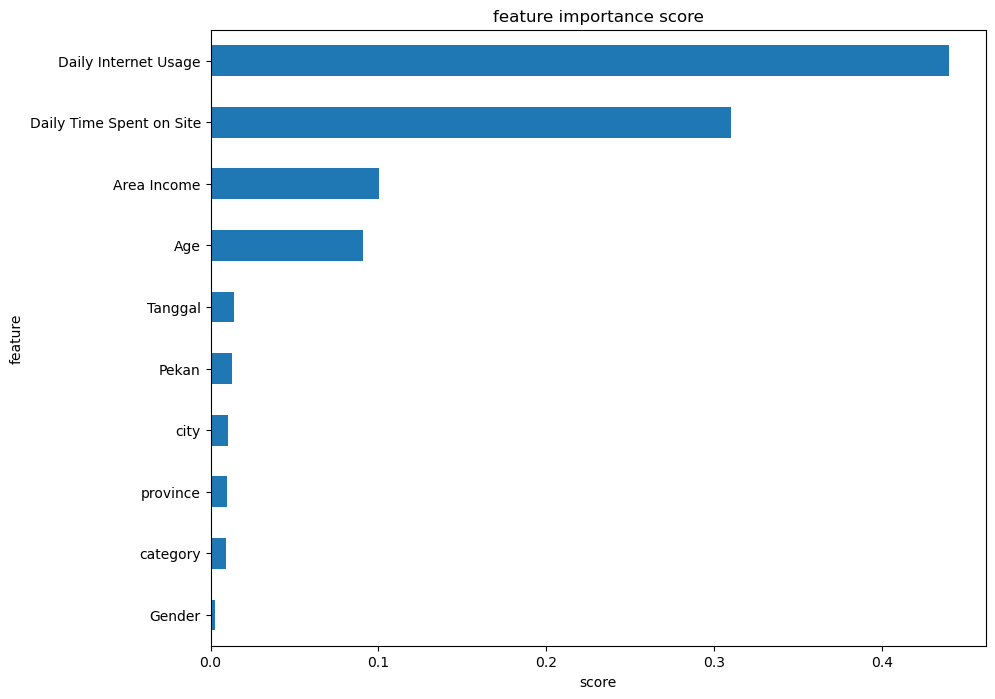

In [42]:
show_feature_importance(rf)

#### Tuning Hyperparameter

In [43]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(1, 200, 50)]
criterion = ['gini', 'entropy']
max_depth = [int(x) for x in np.linspace(2, 100, 50)]
min_samples_split = [int(x) for x in np.linspace(2, 20, 10)]
min_samples_leaf = [int(x) for x in np.linspace(2, 20, 10)]
hyperparameters = dict(n_estimators=n_estimators, criterion=criterion, max_depth=max_depth,
                       min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)

rf = RandomForestClassifier(random_state=42)
rf_tuning = RandomizedSearchCV(rf, hyperparameters, scoring='accuracy', random_state=42, cv=5)
rf_tuning.fit(X_train, y_train)
eval_classification(rf_tuning)

Accuracy (Train Set): 0.99
Accuracy (Test Set): 0.95 

Precision (Train Set): 0.99
Precision (Test Set): 0.95 

Recall (Train Set): 0.98
Recall (Test Set): 0.95 

F1-Score (Train Set): 0.99
F1-Score (Test Set): 0.95 

roc_auc (train-proba): 1.00
roc_auc (test-proba): 0.99 

roc_auc (crossval train): 0.9807500000000001
roc_auc (crossval test): 0.96 



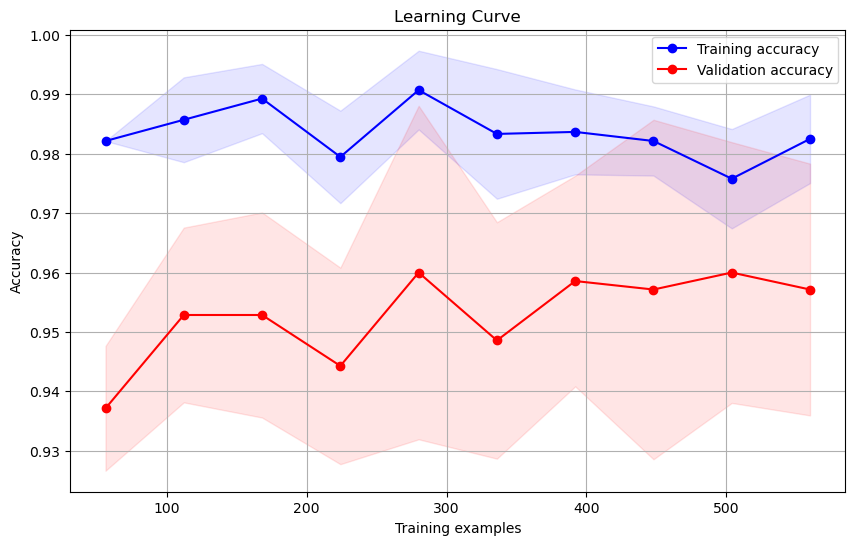

In [44]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, X, y):
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=5, train_sizes=np.linspace(0.1, 1.0, 10))
    
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    
    plt.figure(figsize=(10, 6))
    plt.title('Learning Curve')
    plt.xlabel('Training examples')
    plt.ylabel('Accuracy')
    plt.grid()
    
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='b')
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color='r')
    plt.plot(train_sizes, train_mean, 'o-', color='b', label='Training accuracy')
    plt.plot(train_sizes, test_mean, 'o-', color='r', label='Validation accuracy')
    
    plt.legend(loc='best')
    plt.show()

plot_learning_curve(rf_tuning, X_train, y_train)

### AdaBoost

In [45]:
from sklearn.ensemble import AdaBoostClassifier

ab = AdaBoostClassifier(random_state=42)
ab.fit(X_train, y_train)
eval_classification(ab)

Accuracy (Train Set): 1.00
Accuracy (Test Set): 0.95 

Precision (Train Set): 1.00
Precision (Test Set): 0.95 

Recall (Train Set): 0.99
Recall (Test Set): 0.94 

F1-Score (Train Set): 1.00
F1-Score (Test Set): 0.95 

roc_auc (train-proba): 1.00
roc_auc (test-proba): 0.98 

roc_auc (crossval train): 0.9862499999999998
roc_auc (crossval test): 0.951 



#### Tuning Hyperparameter

In [46]:
from sklearn.model_selection import RandomizedSearchCV

hyperparameters = dict(n_estimators = [int(x) for x in np.linspace(start = 50, stop = 2000, num = 2000)], # Jumlah iterasi
                       learning_rate = [float(x) for x in np.linspace(start = 0.001, stop = 0.1, num = 200)],  
                       algorithm = ['SAMME', 'SAMME.R']
                      )

ab = AdaBoostClassifier(random_state=42)
ab_tuning = RandomizedSearchCV(ab, hyperparameters, cv=5, scoring='accuracy',random_state=42)
ab_tuning.fit(X_train,y_train)
eval_classification(ab_tuning)

Accuracy (Train Set): 0.98
Accuracy (Test Set): 0.95 

Precision (Train Set): 1.00
Precision (Test Set): 0.95 

Recall (Train Set): 0.96
Recall (Test Set): 0.95 

F1-Score (Train Set): 0.98
F1-Score (Test Set): 0.95 

roc_auc (train-proba): 1.00
roc_auc (test-proba): 0.99 

roc_auc (crossval train): 0.9745000000000001
roc_auc (crossval test): 0.961 



### XGBoost

In [47]:
from xgboost import XGBClassifier

xg = XGBClassifier(random_state=42)
xg.fit(X_train, y_train)
eval_classification(xg)

Accuracy (Train Set): 1.00
Accuracy (Test Set): 0.94 

Precision (Train Set): 1.00
Precision (Test Set): 0.95 

Recall (Train Set): 1.00
Recall (Test Set): 0.94 

F1-Score (Train Set): 1.00
F1-Score (Test Set): 0.94 

roc_auc (train-proba): 1.00
roc_auc (test-proba): 0.98 

roc_auc (crossval train): 1.0
roc_auc (crossval test): 0.9570000000000001 



#### Tuning Hyperparameter

In [48]:
from sklearn.model_selection import RandomizedSearchCV

#Menjadikan ke dalam bentuk dictionary
hyperparameters = {
                    'max_depth' : [int(x) for x in np.linspace(10, 110, num = 11)],
                    'min_child_weight' : [int(x) for x in np.linspace(1, 20, num = 11)],
                    'gamma' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'tree_method' : ['auto', 'exact', 'approx', 'hist'],

                    'colsample_bytree' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'eta' : [float(x) for x in np.linspace(0, 1, num = 100)],

                    'lambda' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'alpha' : [float(x) for x in np.linspace(0, 1, num = 11)]
                    }

xg = XGBClassifier(random_state=42)
xg_tuning = RandomizedSearchCV(xg, hyperparameters, cv=5, random_state=42, scoring='accuracy')
xg_tuning.fit(X_train,y_train)
eval_classification(xg_tuning)

Accuracy (Train Set): 1.00
Accuracy (Test Set): 0.94 

Precision (Train Set): 1.00
Precision (Test Set): 0.96 

Recall (Train Set): 1.00
Recall (Test Set): 0.93 

F1-Score (Train Set): 1.00
F1-Score (Test Set): 0.94 

roc_auc (train-proba): 1.00
roc_auc (test-proba): 0.98 

roc_auc (crossval train): 0.9775
roc_auc (crossval test): 0.954 



## Skenario 2 (Model Dengan Normalisasi)

### Logistic Regression

In [49]:
from sklearn.linear_model import LogisticRegression # import logistic regression dari sklearn

lr_norm = LogisticRegression(random_state=42) # inisiasi object dengan nama lr_norm
lr_norm.fit(X_train_norm, y_train) # fit model regression dari data train
eval_classification(lr_norm)

Accuracy (Train Set): 0.51
Accuracy (Test Set): 0.49 

Precision (Train Set): 0.00
Precision (Test Set): 0.00 

Recall (Train Set): 0.00
Recall (Test Set): 0.00 

F1-Score (Train Set): 0.00
F1-Score (Test Set): 0.00 

roc_auc (train-proba): 0.50
roc_auc (test-proba): 0.50 

roc_auc (crossval train): 0.5
roc_auc (crossval test): 0.5 



#### Tuning Hyperparameter

In [50]:
from sklearn.model_selection import RandomizedSearchCV

penalty = ['l1', 'l2']
C = [float(x) for x in np.linspace(0.0001, 0.05, 100)]
hyperparameters = dict(penalty=penalty, C=C)

lr_norm = LogisticRegression(random_state=42)
lr_norm_tuning = RandomizedSearchCV(lr_norm, hyperparameters, scoring='accuracy', random_state=42, cv=5, n_iter=50)
lr_norm_tuning.fit(X_train_norm, y_train)
eval_classification(lr_norm_tuning)

Accuracy (Train Set): 0.51
Accuracy (Test Set): 0.49 

Precision (Train Set): 0.00
Precision (Test Set): 0.00 

Recall (Train Set): 0.00
Recall (Test Set): 0.00 

F1-Score (Train Set): 0.00
F1-Score (Test Set): 0.00 

roc_auc (train-proba): 0.50
roc_auc (test-proba): 0.50 

roc_auc (crossval train): 0.5
roc_auc (crossval test): 0.5 



### KNN

In [51]:
from sklearn.neighbors import KNeighborsClassifier # import KNN dari sklearn

knn_norm = KNeighborsClassifier() # inisiasi object dengan nama knn_norm
knn_norm.fit(X_train_norm, y_train) # fit model KNN dari data train
eval_classification(knn_norm)

Accuracy (Train Set): 0.51
Accuracy (Test Set): 0.49 

Precision (Train Set): 0.00
Precision (Test Set): 0.00 

Recall (Train Set): 0.00
Recall (Test Set): 0.00 

F1-Score (Train Set): 0.00
F1-Score (Test Set): 0.00 

roc_auc (train-proba): 0.50
roc_auc (test-proba): 0.50 

roc_auc (crossval train): 0.76475
roc_auc (crossval test): 0.655 



#### Tuning Hyperparameter

In [52]:
from sklearn.model_selection import RandomizedSearchCV

n_neighbors = list(range(1,30))
p=[1,2]
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']
hyperparameters = dict(n_neighbors=n_neighbors, p=p, algorithm=algorithm)

knn_norm.fit(X_train, y_train)
knn_norm_tuning = RandomizedSearchCV(knn_norm, hyperparameters, scoring='accuracy', random_state=42, cv=5)
knn_norm_tuning.fit(X_train_norm, y_train)
eval_classification(knn_norm_tuning)

Accuracy (Train Set): 0.51
Accuracy (Test Set): 0.49 

Precision (Train Set): 0.00
Precision (Test Set): 0.00 

Recall (Train Set): 0.00
Recall (Test Set): 0.00 

F1-Score (Train Set): 0.00
F1-Score (Test Set): 0.00 

roc_auc (train-proba): 0.50
roc_auc (test-proba): 0.50 

roc_auc (crossval train): 0.7365
roc_auc (crossval test): 0.694 



### Decision Tree

In [53]:
from sklearn.tree import DecisionTreeClassifier # import decision tree dari sklearn

dt_norm = DecisionTreeClassifier(random_state=42) # inisiasi object dengan nama dt_norm
dt_norm.fit(X_train_norm, y_train) # fit model decision tree dari data train
eval_classification(dt_norm)

Accuracy (Train Set): 0.49
Accuracy (Test Set): 0.49 

Precision (Train Set): 0.39
Precision (Test Set): 0.52 

Recall (Train Set): 0.07
Recall (Test Set): 0.10 

F1-Score (Train Set): 0.11
F1-Score (Test Set): 0.17 

roc_auc (train-proba): 0.48
roc_auc (test-proba): 0.50 

roc_auc (crossval train): 1.0
roc_auc (crossval test): 0.938 



#### Tuning Hyperparameter

In [54]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

max_depth = [int(x) for x in np.linspace(1, 110, num = 30)] # Maximum number of levels in tree
min_samples_split = [2, 5, 10, 100] # Minimum number of samples required to split a node
min_samples_leaf = [1, 2, 4, 10, 20, 50] # Minimum number of samples required at each leaf node
max_features = ['auto', 'sqrt'] # Number of features to consider at every split
criterion = ['gini','entropy']
splitter = ['best','random']

hyperparameters = dict(max_depth=max_depth, 
                       min_samples_split=min_samples_split, 
                       min_samples_leaf=min_samples_leaf,
                       max_features=max_features,
                       criterion=criterion,
                       splitter=splitter
                      )

dt_norm = DecisionTreeClassifier(random_state=42)
dt_norm_tuning = RandomizedSearchCV(dt_norm, hyperparameters, cv=5, scoring='accuracy',random_state=42)
dt_norm_tuning.fit(X_train_norm, y_train)
eval_classification(dt_norm_tuning)

Accuracy (Train Set): 0.49
Accuracy (Test Set): 0.51 

Precision (Train Set): 0.49
Precision (Test Set): 0.51 

Recall (Train Set): 1.00
Recall (Test Set): 1.00 

F1-Score (Train Set): 0.66
F1-Score (Test Set): 0.68 

roc_auc (train-proba): 0.50
roc_auc (test-proba): 0.50 

roc_auc (crossval train): 0.96225
roc_auc (crossval test): 0.9190000000000002 



### Random Forest

In [55]:
from sklearn.ensemble import RandomForestClassifier

rf_norm = RandomForestClassifier(random_state=42)
rf_norm.fit(X_train, y_train)
eval_classification(rf_norm)

Accuracy (Train Set): 1.00
Accuracy (Test Set): 0.95 

Precision (Train Set): 1.00
Precision (Test Set): 0.97 

Recall (Train Set): 1.00
Recall (Test Set): 0.94 

F1-Score (Train Set): 1.00
F1-Score (Test Set): 0.95 

roc_auc (train-proba): 1.00
roc_auc (test-proba): 0.99 

roc_auc (crossval train): 1.0
roc_auc (crossval test): 0.96 



#### Tuning Hyperparameter

In [56]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(1, 200, 50)]
criterion = ['gini', 'entropy']
max_depth = [int(x) for x in np.linspace(2, 100, 50)]
min_samples_split = [int(x) for x in np.linspace(2, 20, 10)]
min_samples_leaf = [int(x) for x in np.linspace(2, 20, 10)]
hyperparameters = dict(n_estimators=n_estimators, criterion=criterion, max_depth=max_depth,
                       min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)

rf_norm = RandomForestClassifier(random_state=42)
rf_norm_tuning = RandomizedSearchCV(rf_norm, hyperparameters, scoring='accuracy', random_state=42, cv=5)
rf_norm_tuning.fit(X_train_norm, y_train)
eval_classification(rf_norm_tuning)

Accuracy (Train Set): 0.51
Accuracy (Test Set): 0.49 

Precision (Train Set): 0.00
Precision (Test Set): 0.00 

Recall (Train Set): 0.00
Recall (Test Set): 0.00 

F1-Score (Train Set): 0.00
F1-Score (Test Set): 0.00 

roc_auc (train-proba): 0.54
roc_auc (test-proba): 0.54 

roc_auc (crossval train): 0.9807500000000001
roc_auc (crossval test): 0.96 



### AdaBoost

In [57]:
from sklearn.ensemble import AdaBoostClassifier

ab_norm = AdaBoostClassifier(random_state=42)
ab_norm.fit(X_train_norm, y_train)
eval_classification(ab_norm)

Accuracy (Train Set): 0.51
Accuracy (Test Set): 0.49 

Precision (Train Set): 0.00
Precision (Test Set): 0.00 

Recall (Train Set): 0.00
Recall (Test Set): 0.00 

F1-Score (Train Set): 0.00
F1-Score (Test Set): 0.00 

roc_auc (train-proba): 0.51
roc_auc (test-proba): 0.53 

roc_auc (crossval train): 0.9862499999999998
roc_auc (crossval test): 0.951 



#### Tuning Hyperparameter

In [58]:
from sklearn.model_selection import RandomizedSearchCV

hyperparameters = dict(n_estimators = [int(x) for x in np.linspace(start = 50, stop = 2000, num = 2000)], # Jumlah iterasi
                       learning_rate = [float(x) for x in np.linspace(start = 0.001, stop = 0.1, num = 200)],  
                       algorithm = ['SAMME', 'SAMME.R']
                      )

ab_norm = AdaBoostClassifier(random_state=42)
ab_norm_tuning = RandomizedSearchCV(ab_norm, hyperparameters, cv=5, scoring='accuracy',random_state=42)
ab_norm_tuning.fit(X_train_norm,y_train)
eval_classification(ab_norm_tuning)

Accuracy (Train Set): 0.51
Accuracy (Test Set): 0.49 

Precision (Train Set): 0.00
Precision (Test Set): 0.00 

Recall (Train Set): 0.00
Recall (Test Set): 0.00 

F1-Score (Train Set): 0.00
F1-Score (Test Set): 0.00 

roc_auc (train-proba): 0.50
roc_auc (test-proba): 0.53 

roc_auc (crossval train): 0.9745000000000001
roc_auc (crossval test): 0.961 



### XGBoost

In [59]:
from xgboost import XGBClassifier

xg_norm = XGBClassifier(random_state=42)
xg_norm.fit(X_train_norm, y_train)
eval_classification(xg_norm)

Accuracy (Train Set): 0.51
Accuracy (Test Set): 0.49 

Precision (Train Set): 0.00
Precision (Test Set): 0.00 

Recall (Train Set): 0.00
Recall (Test Set): 0.00 

F1-Score (Train Set): 0.00
F1-Score (Test Set): 0.00 

roc_auc (train-proba): 0.51
roc_auc (test-proba): 0.50 

roc_auc (crossval train): 1.0
roc_auc (crossval test): 0.9570000000000001 



#### Tuning Hyperparameter

In [60]:
from sklearn.model_selection import RandomizedSearchCV

#Menjadikan ke dalam bentuk dictionary
hyperparameters = {
                    'max_depth' : [int(x) for x in np.linspace(10, 110, num = 11)],
                    'min_child_weight' : [int(x) for x in np.linspace(1, 20, num = 11)],
                    'gamma' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'tree_method' : ['auto', 'exact', 'approx', 'hist'],

                    'colsample_bytree' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'eta' : [float(x) for x in np.linspace(0, 1, num = 100)],

                    'lambda' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'alpha' : [float(x) for x in np.linspace(0, 1, num = 11)]
                    }

xg_norm = XGBClassifier(random_state=42)
xg_norm_tuning = RandomizedSearchCV(xg_norm, hyperparameters, cv=5, random_state=42, scoring='accuracy')
xg_norm_tuning.fit(X_train_norm,y_train)
eval_classification(xg_norm_tuning)

Accuracy (Train Set): 0.51
Accuracy (Test Set): 0.49 

Precision (Train Set): 0.00
Precision (Test Set): 0.00 

Recall (Train Set): 0.00
Recall (Test Set): 0.00 

F1-Score (Train Set): 0.00
F1-Score (Test Set): 0.00 

roc_auc (train-proba): 0.50
roc_auc (test-proba): 0.50 

roc_auc (crossval train): 0.9775
roc_auc (crossval test): 0.954 



## Evaluation

In [61]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, classes):
    cm = confusion_matrix(y_true, y_pred)
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]  # Normalisasi
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='.2f', xticklabels=classes, yticklabels=classes)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

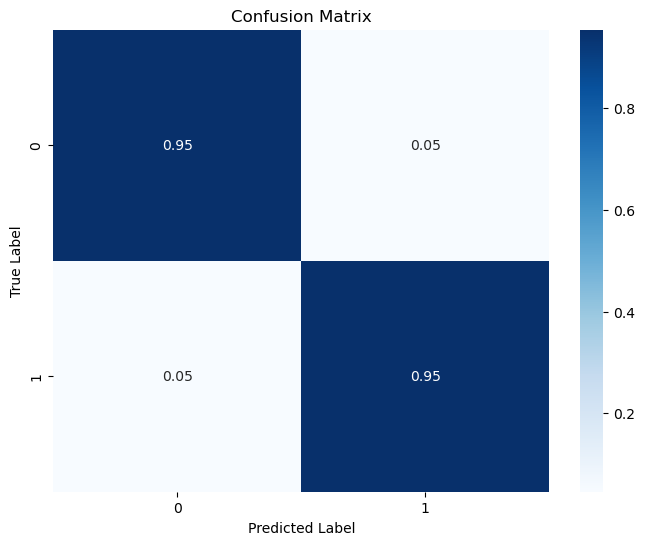

In [62]:
y_pred = rf_tuning.predict(X_test)

plot_confusion_matrix(y_test, y_pred, ['0', '1'])